In [6]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST, ImageFolder, CIFAR10
from torch.utils.data import DataLoader
from model import Discriminator, Generator, initialize_weights
import matplotlib.pyplot as plt
from utils import gradient_penalty
from dataset import CelebDataset
from tqdm.auto import tqdm

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
learning_rate = 1e-4
batch_size = 64
image_size = 64
channels_img = 1
z_dim = 100
num_epochs = 40
features_d = 16
features_g = 16
critic_iterations = 5
lambda_gp = 10

transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5 for _ in range(channels_img)], [0.5 for _ in range(channels_img)])
])

In [8]:
dataset = dataset = MNIST(root='data', download=True, train=True, transform=transforms)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [9]:
gen = Generator(z_dim, channels_img, features_g).to(device)
disc = Discriminator(channels_img, features_d).to(device)
initialize_weights(gen)
initialize_weights(disc)

opt_gen = optim.Adam(gen.parameters(), learning_rate, betas=(0.0, 0.9))
opt_disc = optim.Adam(disc.parameters(), learning_rate, betas=(0.0, 0.9))

fixed_noise = torch.randn(32, z_dim, 1, 1).to(device)

gen.train()
disc.train()

Discriminator(
  (disc): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (4): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (5): Conv2d(128, 1, kernel_size=(4, 4), stride=(2, 2))
  )
)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 0/938 
 loss D: 20.185333251953125 loss G: 0.5637818574905396


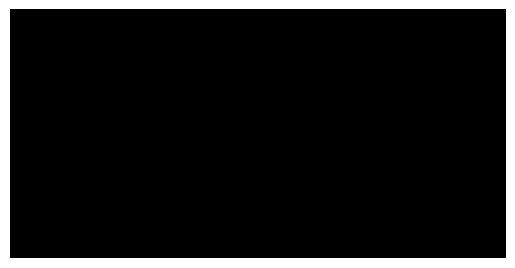

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 100/938 
 loss D: -94.39369201660156 loss G: 56.725563049316406


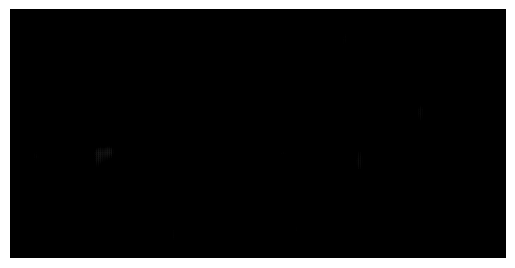

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 200/938 
 loss D: -99.67552185058594 loss G: 73.86441040039062


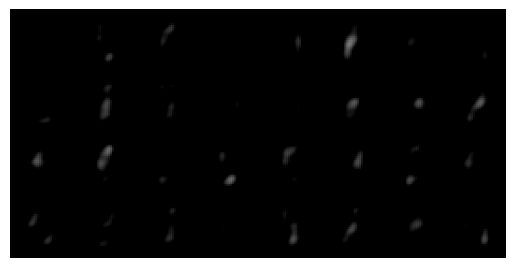

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 300/938 
 loss D: -91.21326446533203 loss G: 82.17253875732422


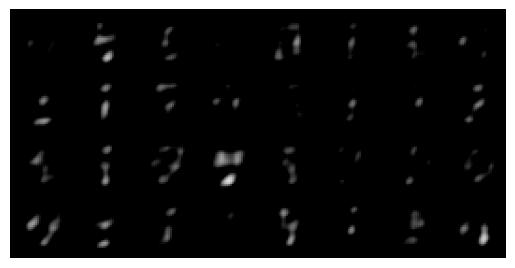

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 400/938 
 loss D: -84.10271453857422 loss G: 85.09751892089844


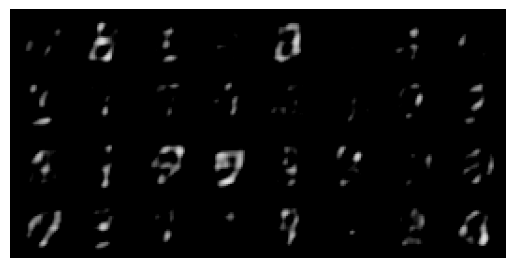

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 500/938 
 loss D: -71.64763641357422 loss G: 74.15861511230469


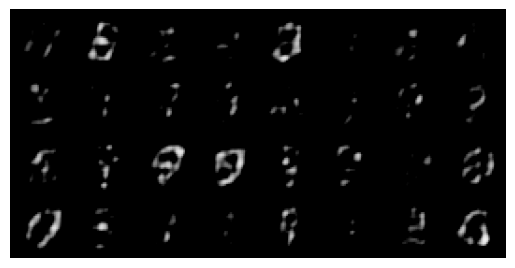

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 600/938 
 loss D: -63.589839935302734 loss G: 76.22891235351562


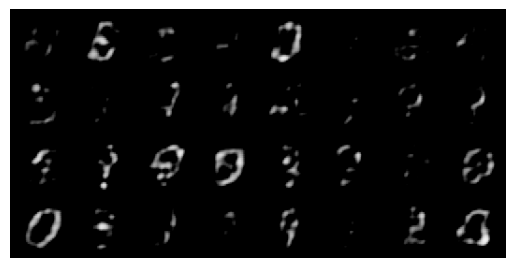

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 700/938 
 loss D: -55.00874328613281 loss G: 69.82437133789062


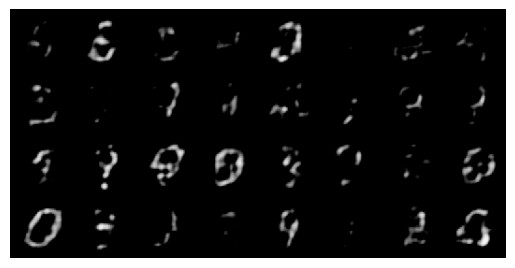

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 800/938 
 loss D: -44.991024017333984 loss G: 75.25885009765625


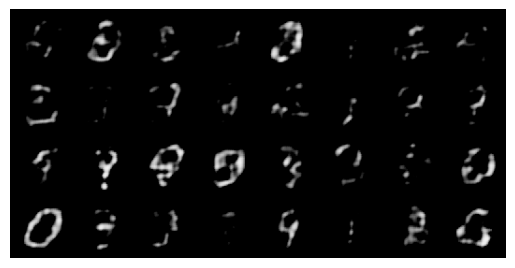

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 0/40 
 batch: 900/938 
 loss D: -39.16029357910156 loss G: 70.81173706054688


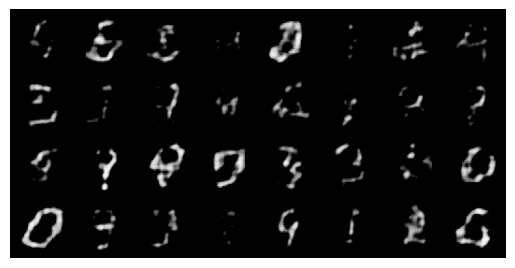

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 0/938 
 loss D: -34.75682830810547 loss G: 69.33765411376953


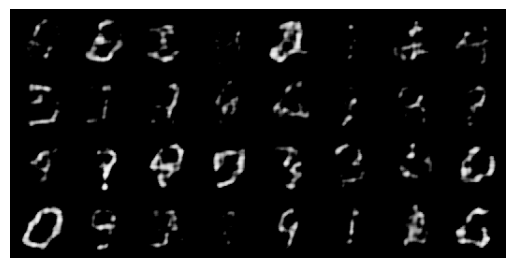

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 100/938 
 loss D: -28.161697387695312 loss G: 69.02542877197266


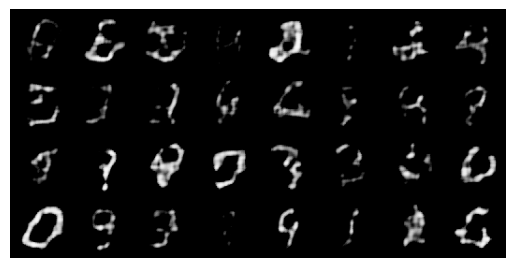

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 200/938 
 loss D: -23.77130889892578 loss G: 69.87125396728516


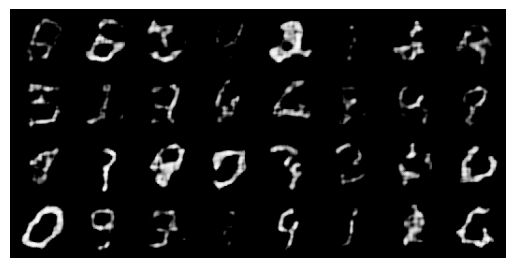

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 300/938 
 loss D: -18.846752166748047 loss G: 68.55903625488281


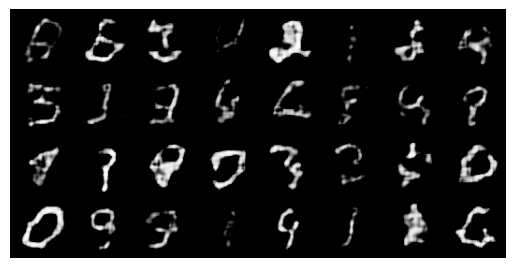

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 400/938 
 loss D: -15.709952354431152 loss G: 63.59767150878906


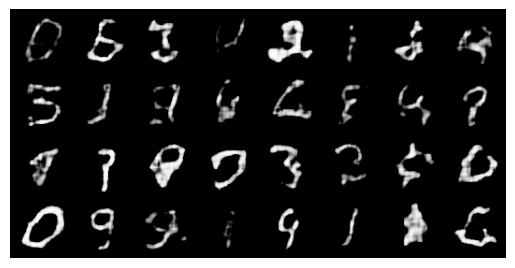

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 500/938 
 loss D: -13.217697143554688 loss G: 67.04670715332031


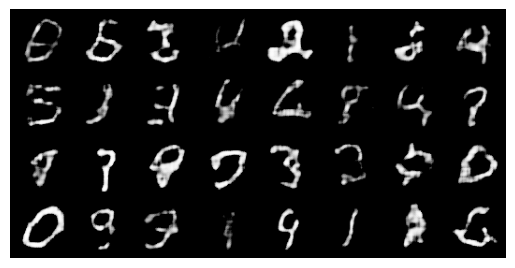

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 600/938 
 loss D: -11.046462059020996 loss G: 63.35859680175781


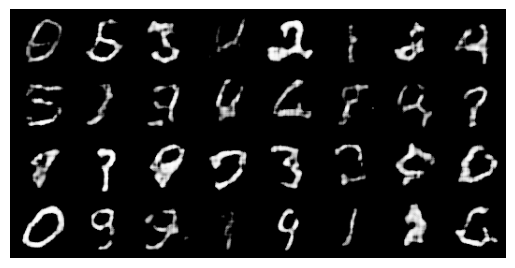

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 700/938 
 loss D: -8.959451675415039 loss G: 63.91463088989258


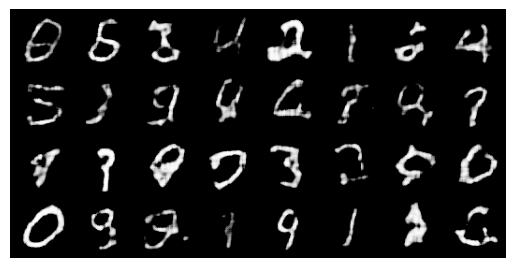

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 800/938 
 loss D: -9.698944091796875 loss G: 60.25804901123047


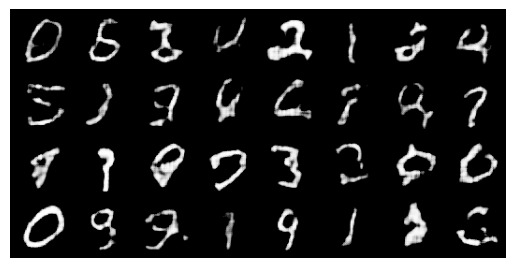

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 1/40 
 batch: 900/938 
 loss D: -7.775571823120117 loss G: 57.040611267089844


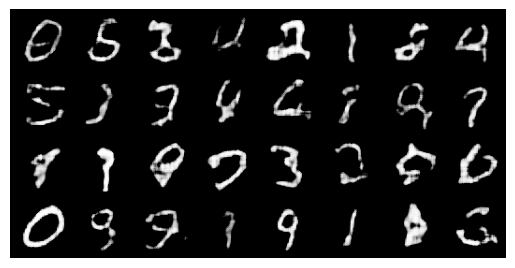

  0%|          | 0/938 [00:00<?, ?it/s]

epoch: 2/40 
 batch: 0/938 
 loss D: -10.015094757080078 loss G: 61.65607452392578


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


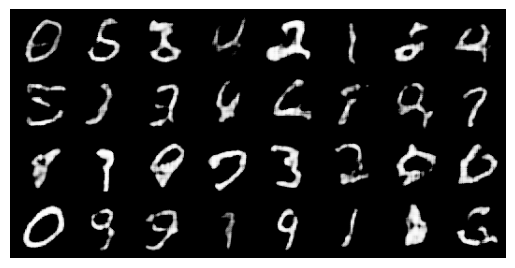

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 100/938 
 loss D: -11.286514282226562 loss G: 59.150901794433594


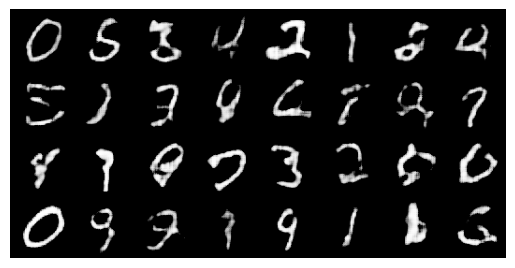

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 200/938 
 loss D: -9.269283294677734 loss G: 56.53898620605469


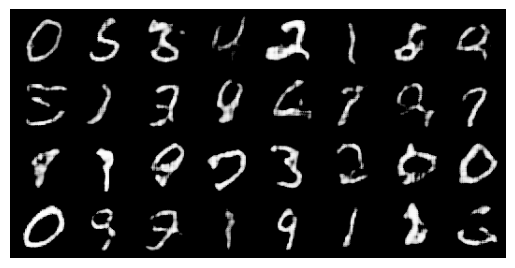

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 300/938 
 loss D: -8.891861915588379 loss G: 53.16919708251953


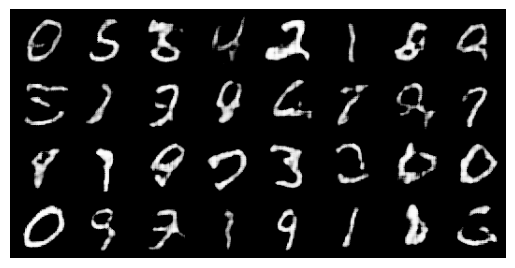

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 400/938 
 loss D: -11.14098072052002 loss G: 58.386253356933594


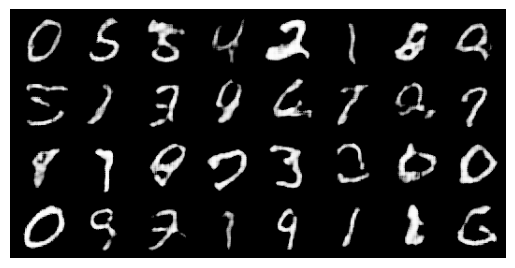

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 500/938 
 loss D: -9.232973098754883 loss G: 60.959442138671875


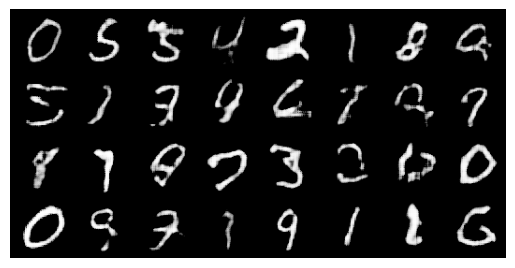

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 600/938 
 loss D: -8.008464813232422 loss G: 61.25756072998047


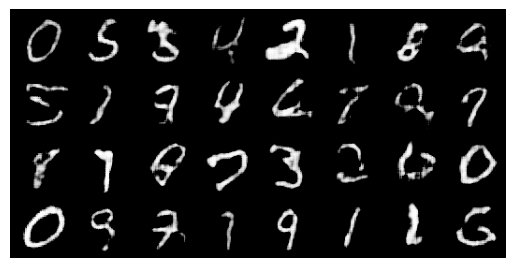

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 700/938 
 loss D: -8.785066604614258 loss G: 62.06810760498047


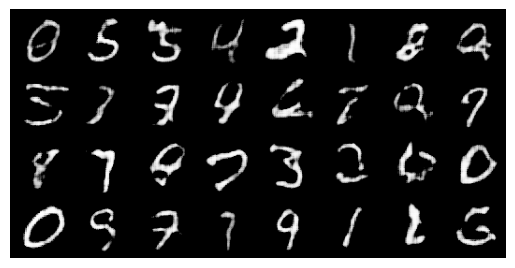

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 800/938 
 loss D: -8.522229194641113 loss G: 59.476531982421875


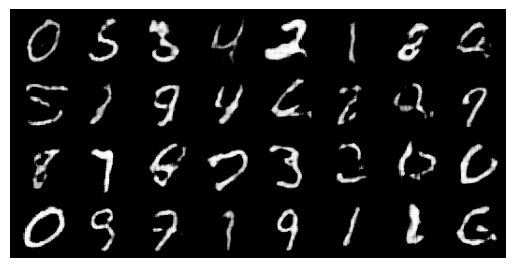

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 2/40 
 batch: 900/938 
 loss D: -9.503665924072266 loss G: 58.22624588012695


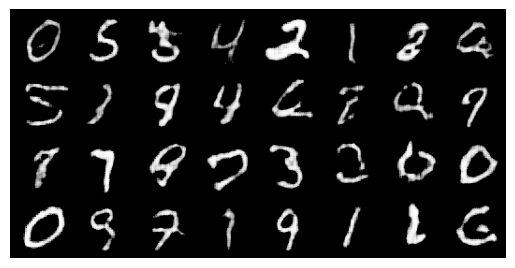

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 0/938 
 loss D: -6.6536545753479 loss G: 60.115745544433594


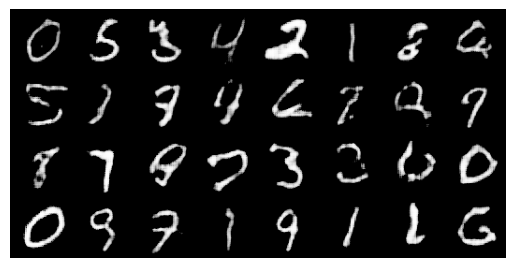

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 100/938 
 loss D: -8.193603515625 loss G: 63.5921630859375


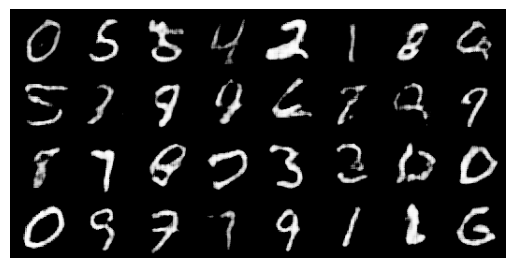

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 200/938 
 loss D: -6.507899284362793 loss G: 60.26481628417969


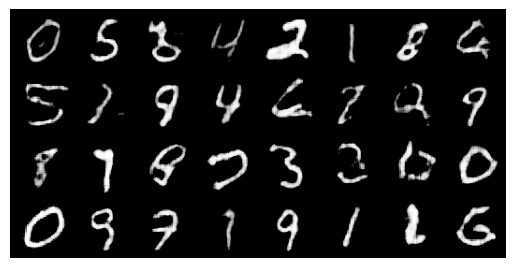

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 300/938 
 loss D: -7.702779769897461 loss G: 63.26348114013672


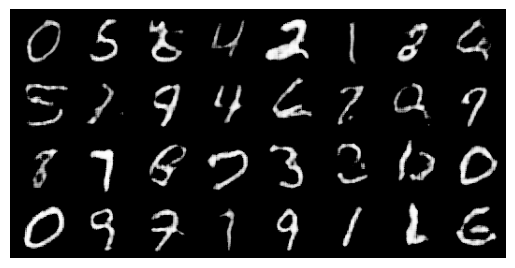

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 400/938 
 loss D: -8.48259162902832 loss G: 60.420814514160156


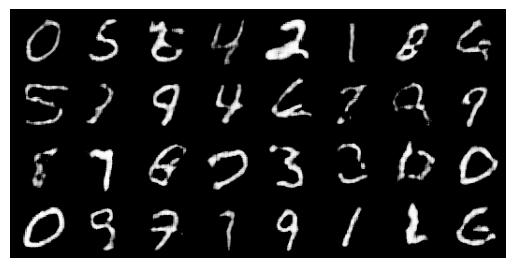

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 500/938 
 loss D: -8.341550827026367 loss G: 61.78179931640625


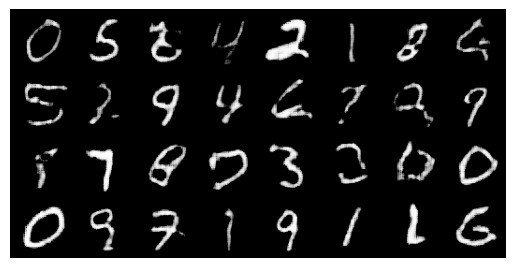

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 600/938 
 loss D: -7.961459159851074 loss G: 62.82889938354492


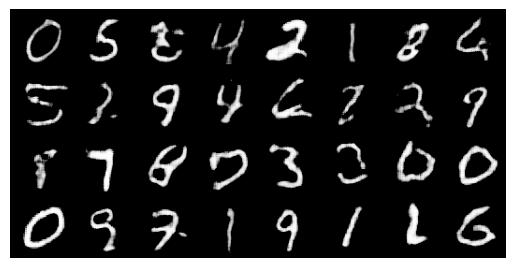

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 700/938 
 loss D: -8.276700973510742 loss G: 59.60820007324219


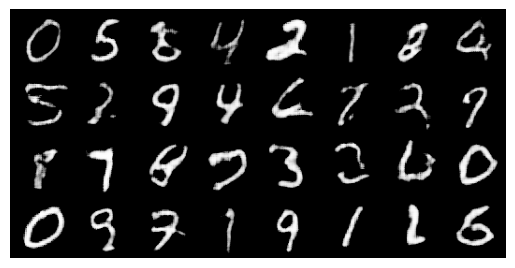

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 800/938 
 loss D: -7.860158443450928 loss G: 60.0777587890625


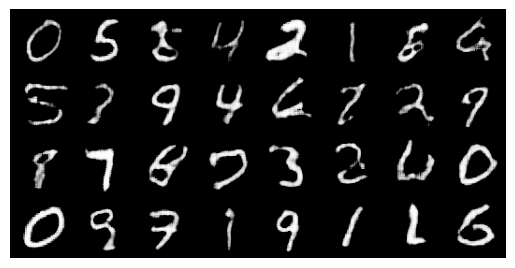

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 3/40 
 batch: 900/938 
 loss D: -7.426056861877441 loss G: 66.76087188720703


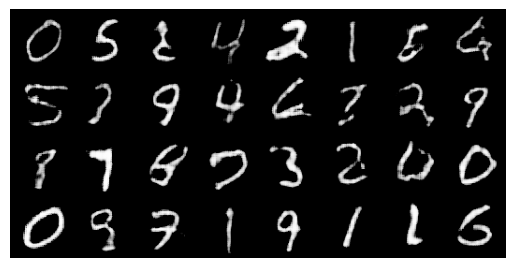

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 0/938 
 loss D: -7.0423784255981445 loss G: 61.39664077758789


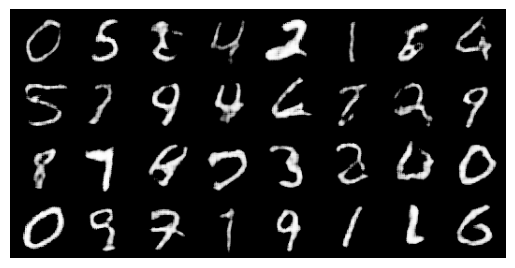

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 100/938 
 loss D: -7.619248867034912 loss G: 63.651458740234375


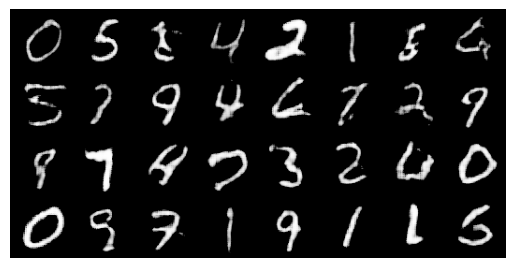

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 200/938 
 loss D: -8.656435012817383 loss G: 63.548431396484375


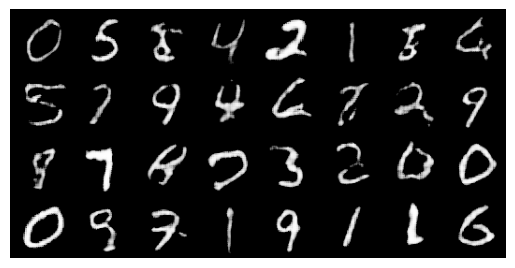

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 300/938 
 loss D: -5.76365852355957 loss G: 67.81747436523438


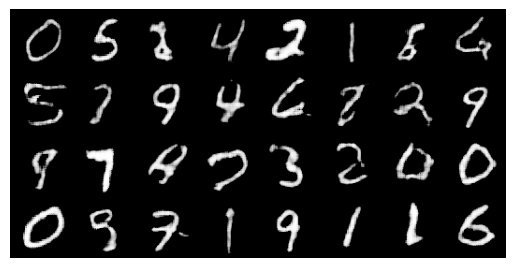

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 400/938 
 loss D: -4.255630016326904 loss G: 59.38563919067383


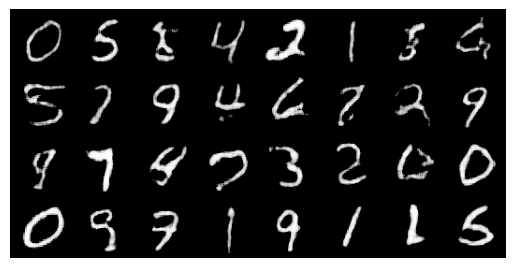

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 500/938 
 loss D: -7.487289905548096 loss G: 64.00445556640625


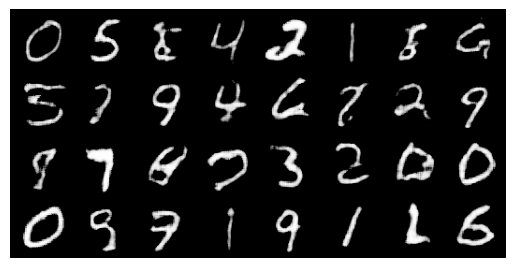

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 600/938 
 loss D: -5.042693138122559 loss G: 65.08186340332031


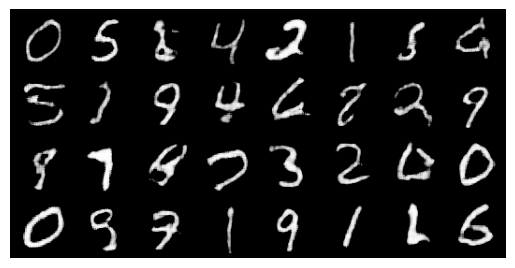

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 700/938 
 loss D: -6.962474822998047 loss G: 64.58433532714844


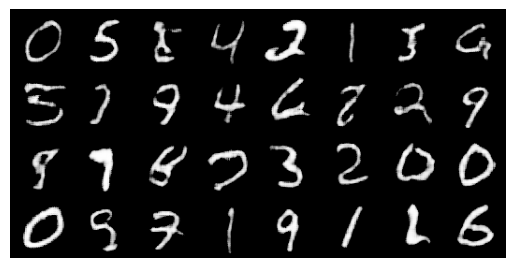

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 800/938 
 loss D: -8.672420501708984 loss G: 65.53695678710938


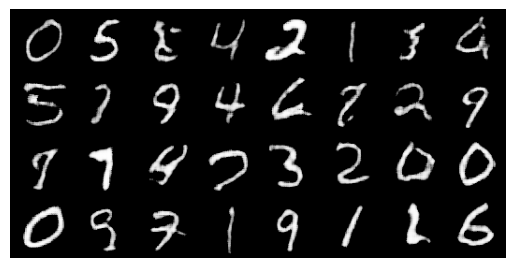

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 4/40 
 batch: 900/938 
 loss D: -8.816051483154297 loss G: 66.85067749023438


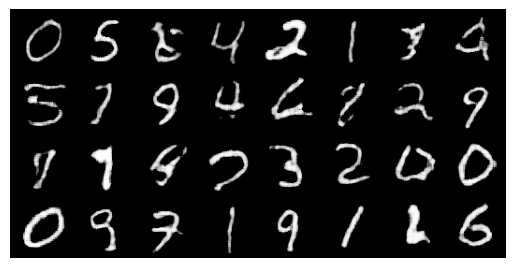

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 0/938 
 loss D: -7.383877754211426 loss G: 67.01664733886719


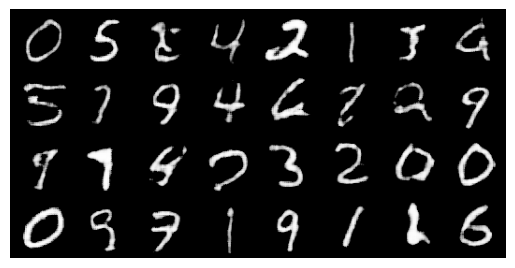

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 100/938 
 loss D: -8.750266075134277 loss G: 66.01331329345703


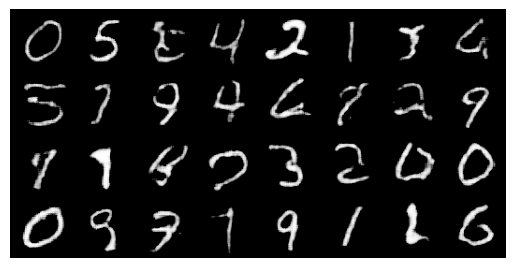

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 200/938 
 loss D: -6.182771682739258 loss G: 73.22401428222656


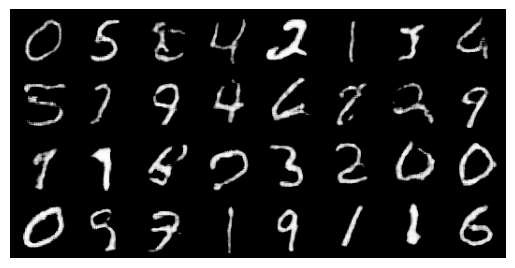

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 300/938 
 loss D: -4.120829105377197 loss G: 65.56637573242188


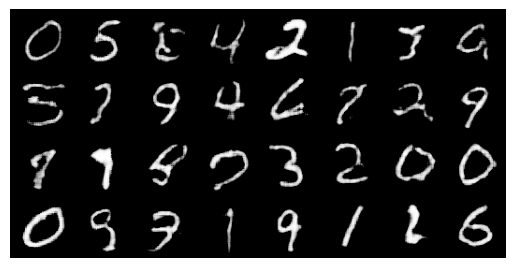

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 400/938 
 loss D: -6.917644500732422 loss G: 63.00995635986328


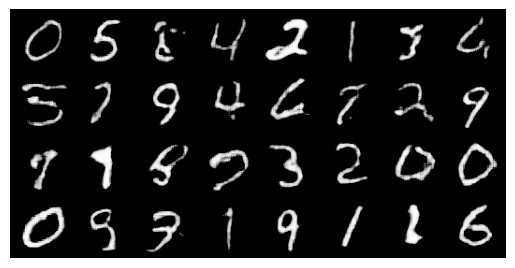

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 500/938 
 loss D: -5.725186347961426 loss G: 65.82835388183594


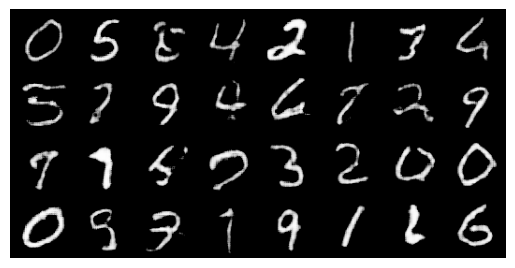

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 600/938 
 loss D: -6.850482940673828 loss G: 67.18232727050781


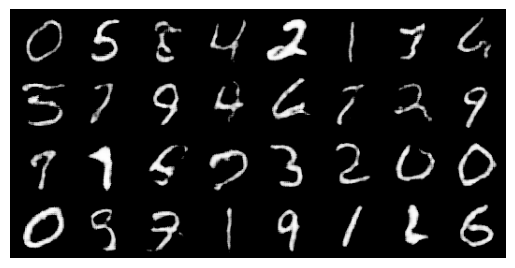

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 700/938 
 loss D: -6.302309989929199 loss G: 65.2134017944336


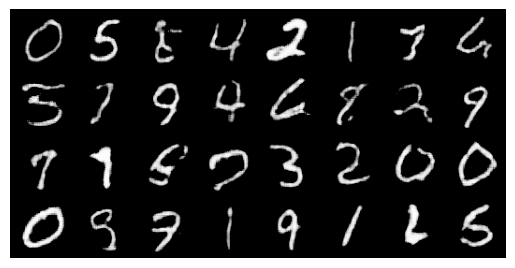

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 800/938 
 loss D: -6.945528030395508 loss G: 70.07366943359375


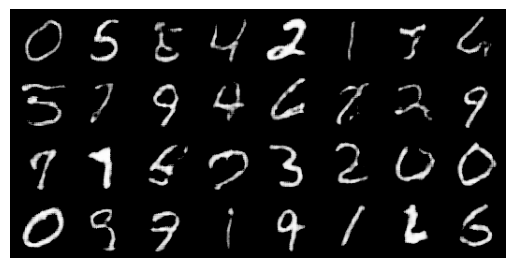

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 5/40 
 batch: 900/938 
 loss D: -6.866414546966553 loss G: 67.72393798828125


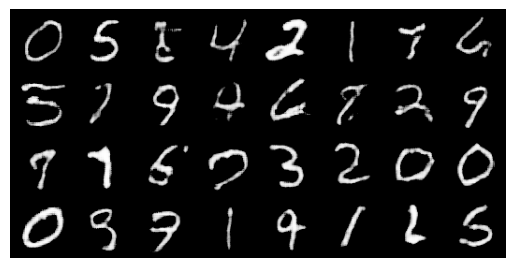

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 0/938 
 loss D: -3.388902187347412 loss G: 64.26187896728516


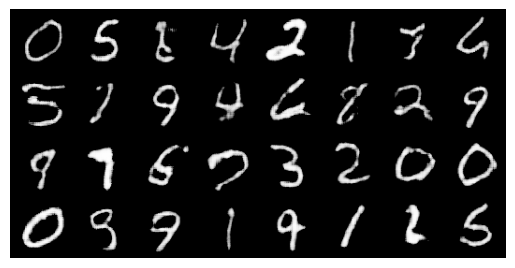

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 100/938 
 loss D: -6.1410017013549805 loss G: 66.65345764160156


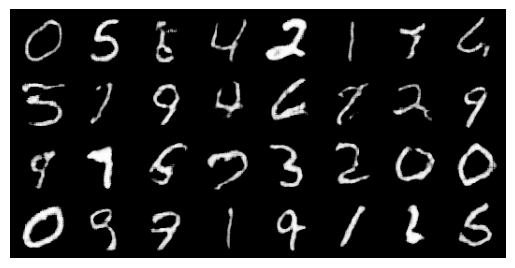

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 200/938 
 loss D: -5.577329158782959 loss G: 69.36763000488281


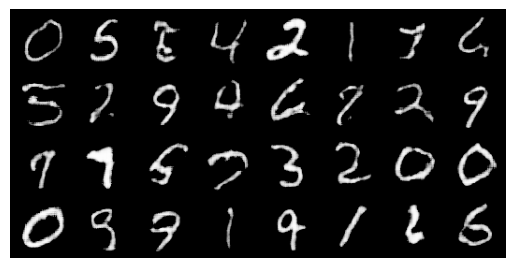

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 300/938 
 loss D: -7.043725967407227 loss G: 68.79029083251953


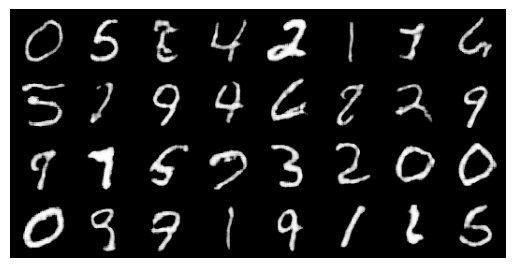

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 400/938 
 loss D: -5.51649284362793 loss G: 69.47837829589844


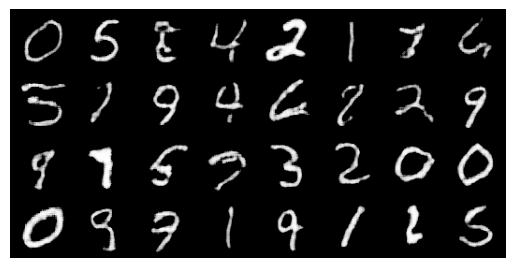

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 500/938 
 loss D: -6.665249347686768 loss G: 69.3467788696289


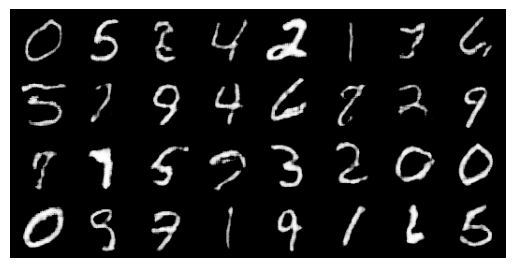

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 600/938 
 loss D: -5.391839504241943 loss G: 64.4100341796875


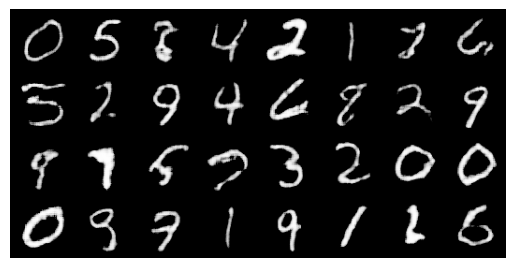

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 700/938 
 loss D: -6.411090850830078 loss G: 69.06819915771484


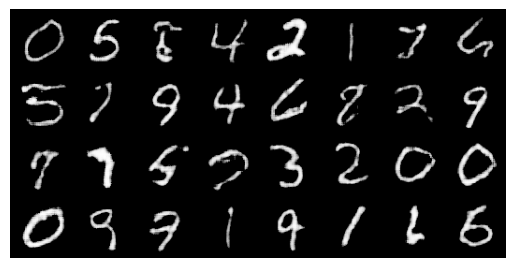

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 800/938 
 loss D: -5.927521228790283 loss G: 68.8431396484375


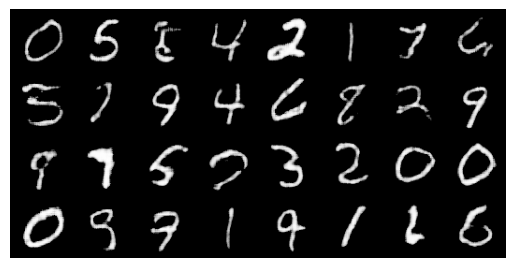

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 6/40 
 batch: 900/938 
 loss D: -6.518836498260498 loss G: 67.50013732910156


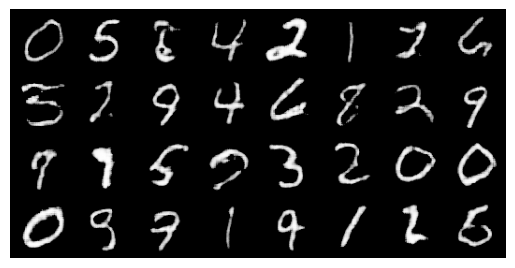

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 0/938 
 loss D: -6.626713752746582 loss G: 61.79833984375


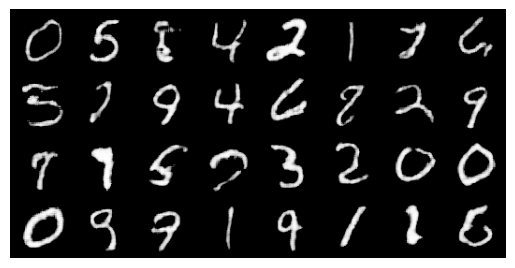

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 100/938 
 loss D: -4.836485862731934 loss G: 68.30194091796875


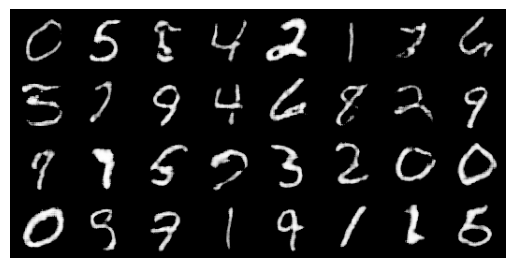

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 200/938 
 loss D: -4.093293190002441 loss G: 70.53376007080078


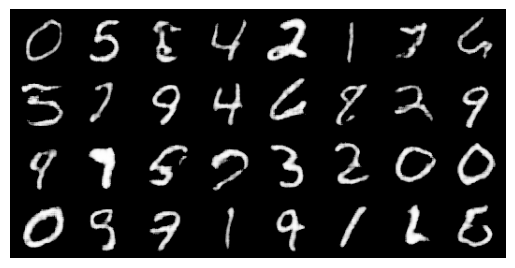

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 300/938 
 loss D: -4.436776638031006 loss G: 64.2918701171875


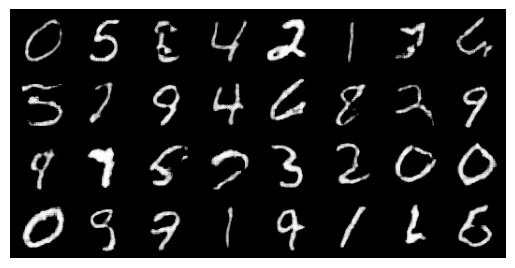

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 400/938 
 loss D: -5.35667610168457 loss G: 67.07508850097656


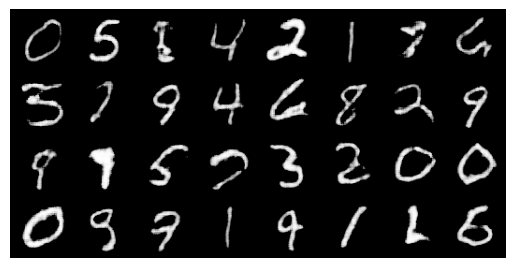

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 500/938 
 loss D: -5.756002426147461 loss G: 68.89839172363281


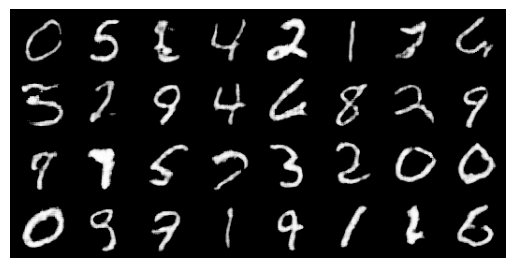

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 600/938 
 loss D: -4.819582939147949 loss G: 67.68795776367188


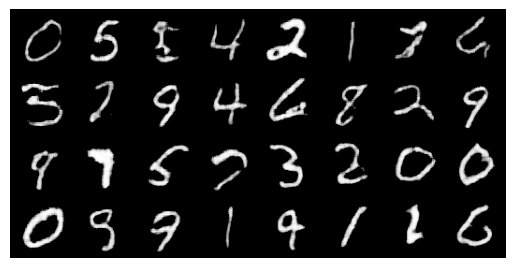

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 700/938 
 loss D: -4.751306056976318 loss G: 68.2635498046875


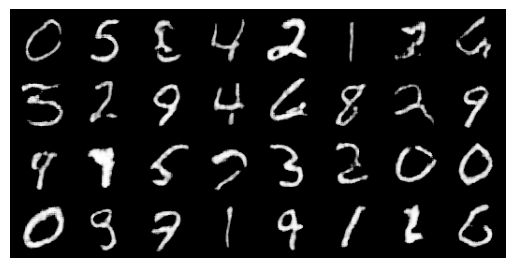

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 800/938 
 loss D: -6.592901229858398 loss G: 70.22539520263672


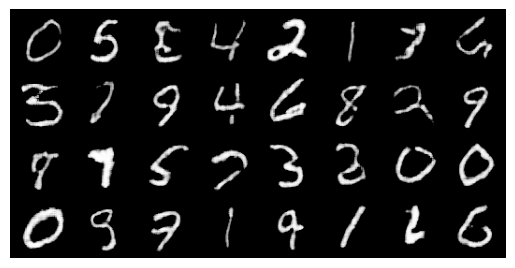

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 7/40 
 batch: 900/938 
 loss D: -5.616117000579834 loss G: 68.79674530029297


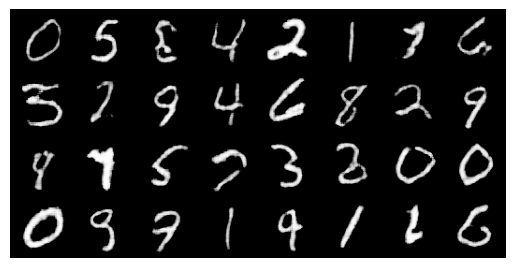

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 0/938 
 loss D: -6.698937892913818 loss G: 67.55308532714844


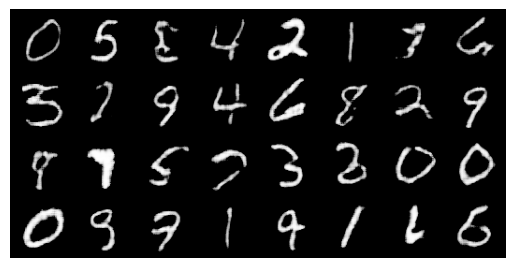

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 100/938 
 loss D: -4.837115287780762 loss G: 71.82695007324219


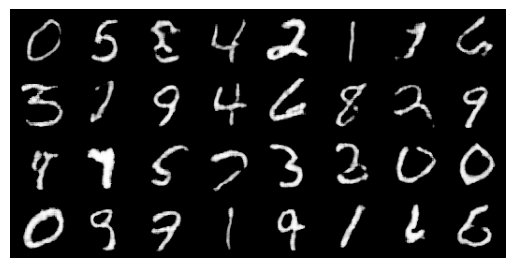

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 200/938 
 loss D: -6.19080114364624 loss G: 70.40536499023438


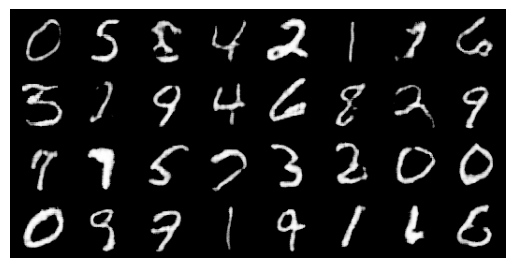

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 300/938 
 loss D: -5.813831806182861 loss G: 64.26042175292969


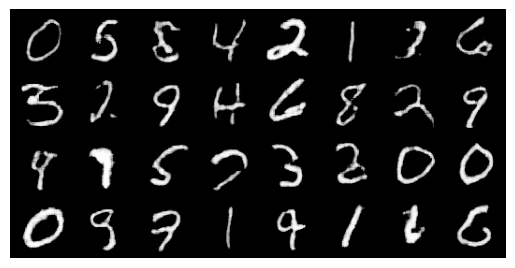

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 400/938 
 loss D: -5.441223621368408 loss G: 69.48648071289062


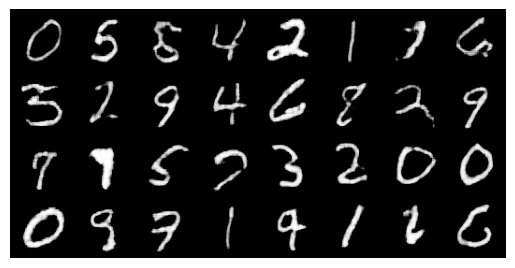

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 500/938 
 loss D: -6.0044074058532715 loss G: 63.30617904663086


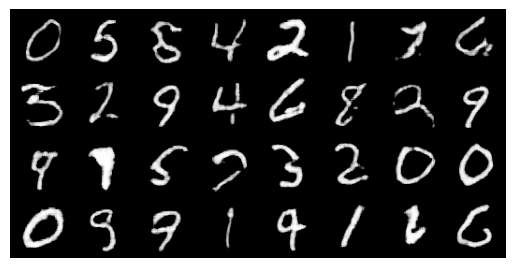

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 600/938 
 loss D: -6.000922203063965 loss G: 63.848365783691406


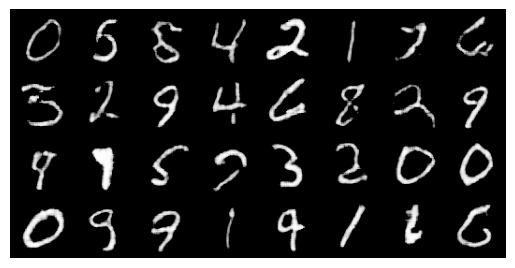

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 700/938 
 loss D: -4.6256632804870605 loss G: 67.84945678710938


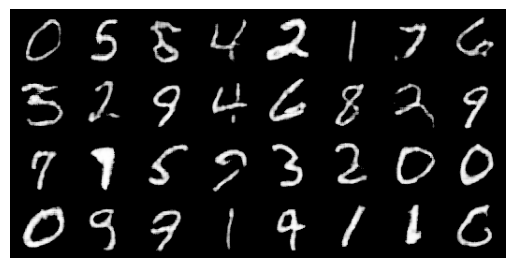

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 800/938 
 loss D: -5.182497501373291 loss G: 68.05415344238281


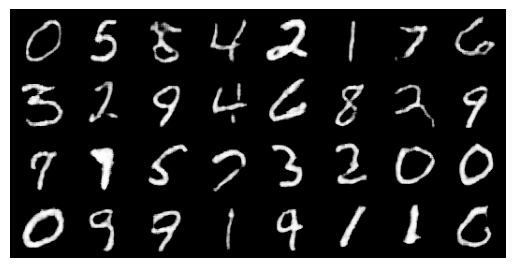

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 8/40 
 batch: 900/938 
 loss D: -4.902926921844482 loss G: 68.45378112792969


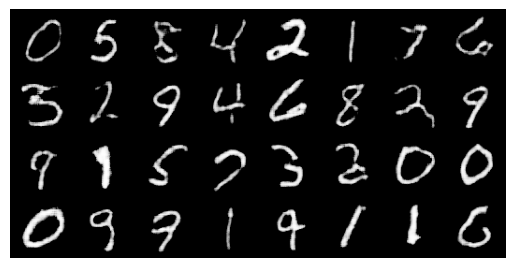

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 0/938 
 loss D: -6.782548904418945 loss G: 67.35853576660156


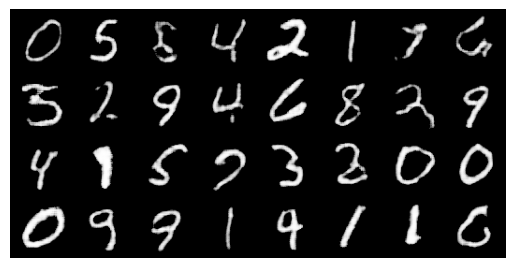

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 100/938 
 loss D: -4.645440101623535 loss G: 70.05711364746094


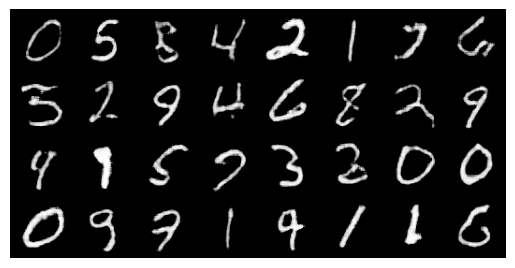

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 200/938 
 loss D: -5.552912712097168 loss G: 67.5772705078125


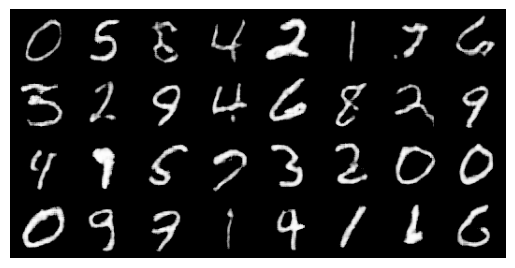

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 300/938 
 loss D: -5.5025858879089355 loss G: 68.94387817382812


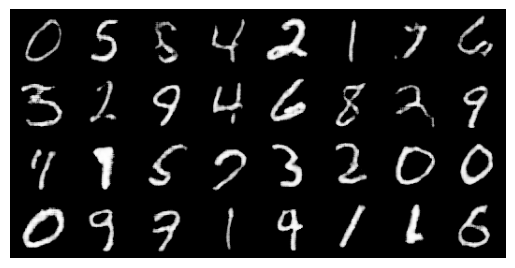

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 400/938 
 loss D: -5.98829984664917 loss G: 66.38406372070312


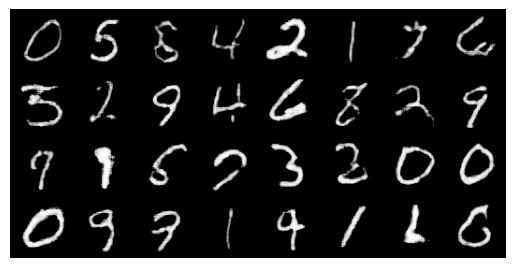

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 500/938 
 loss D: -5.308479309082031 loss G: 66.84715270996094


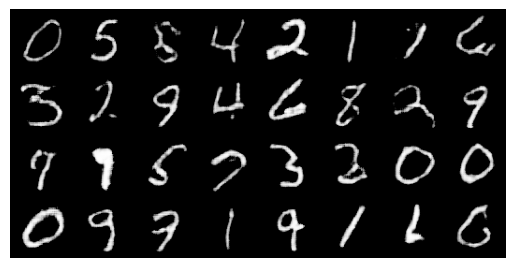

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 600/938 
 loss D: -3.799248218536377 loss G: 67.90109252929688


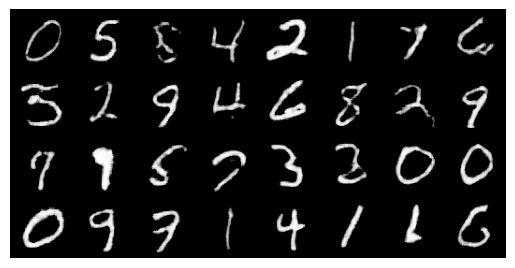

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 700/938 
 loss D: -4.890995979309082 loss G: 67.22685241699219


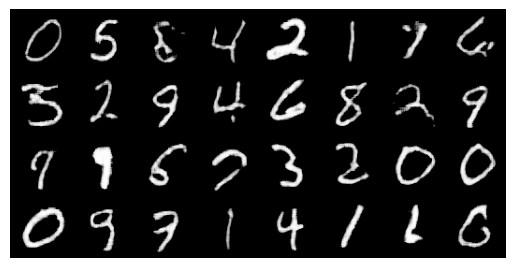

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 800/938 
 loss D: -3.444688081741333 loss G: 70.48904418945312


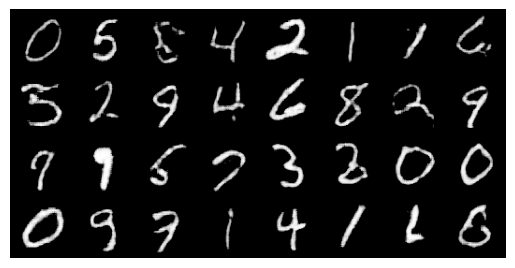

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 9/40 
 batch: 900/938 
 loss D: -5.972825527191162 loss G: 69.28604125976562


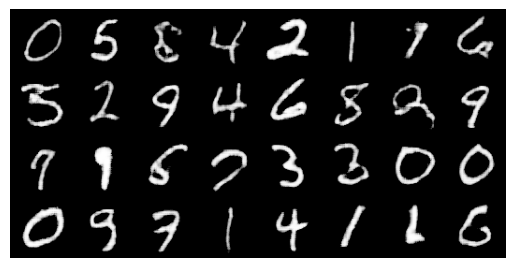

  0%|          | 0/938 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch: 10/40 
 batch: 0/938 
 loss D: -4.907655715942383 loss G: 67.4929428100586


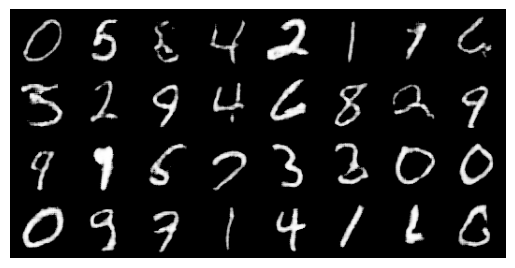

KeyboardInterrupt: 

In [11]:
for epoch in tqdm(range(num_epochs)):
    for batch_idx, (real, _) in enumerate(tqdm(loader)):
        real = real.to(device)
        cur_batch_size = real.shape[0]

        for _ in range(critic_iterations):
            noise = torch.randn(cur_batch_size, z_dim, 1, 1).to(device)
            fake = gen(noise)
            critic_real = disc(real).reshape(-1)
            critic_fake = disc(fake).reshape(-1)
            gp = gradient_penalty(disc, real, fake, device)
            loss_critic = -(torch.mean(critic_real) - torch.mean(critic_fake)) + lambda_gp * gp 
            
            opt_disc.zero_grad()
            loss_critic.backward(retain_graph=True)
            opt_disc.step()

        output = disc(fake).reshape(-1)
        loss_gen = -torch.mean(output)
        opt_gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

        if batch_idx % 100 == 0:
            print(f"epoch: {epoch}/{num_epochs} \n batch: {batch_idx}/{len(loader)} \n loss D: {loss_critic} loss G: {loss_gen}")

            with torch.no_grad():
                fake = gen(fixed_noise)
                fake_flattened = fake.detach().cpu().view(-1, 1, 64, 64)
                fake_grid = torchvision.utils.make_grid(fake_flattened[:32], nrow=8)
                plt.imshow(fake_grid.permute(1, 2, 0).squeeze())
                plt.axis('off')
                plt.show()

In [11]:
from pathlib import Path

In [12]:
disc_path = Path('models')
disc_path.mkdir(parents=True, exist_ok=True)

model_name = 'disc.pth'
model_save_path = disc_path/model_name

torch.save(obj=disc.state_dict(),f=model_save_path)

In [13]:
gen_path = Path('models')
gen_path.mkdir(parents=True, exist_ok=True)

model_name = 'gen.pth'
model_save_path = gen_path/model_name

torch.save(obj=gen.state_dict(),f=model_save_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


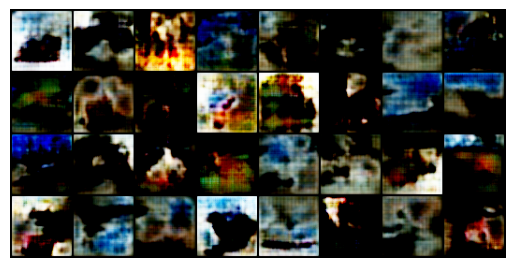

In [19]:
noise = torch.randn(32, z_dim, 1, 1).to(device)
fake = gen(noise)
fake_flattened = fake.detach().cpu().view(-1, 3, 64, 64)
fake_grid = torchvision.utils.make_grid(fake_flattened[:32], nrow=8)
plt.imshow(fake_grid.permute(1, 2, 0).squeeze())
plt.axis('off')
plt.show()